# Assgn_08 Calculating the total amount of coin money  

- Load 'input image' (Korean Coin)
- Write codes of calculating total amount of coin money using opencv python with explanation
- Print out the summation result with images of the intermediate process
 
※ You can use other images (i.e. your country or U.S. coins image) but do the same process and the result.

- filename and type : yourname_assgn_08.pdf
- Due Date : 13 Nov 0900 a.m. (**2 wks** from now, Monday 0900 a.m. 1 day before the 14 Nov class)

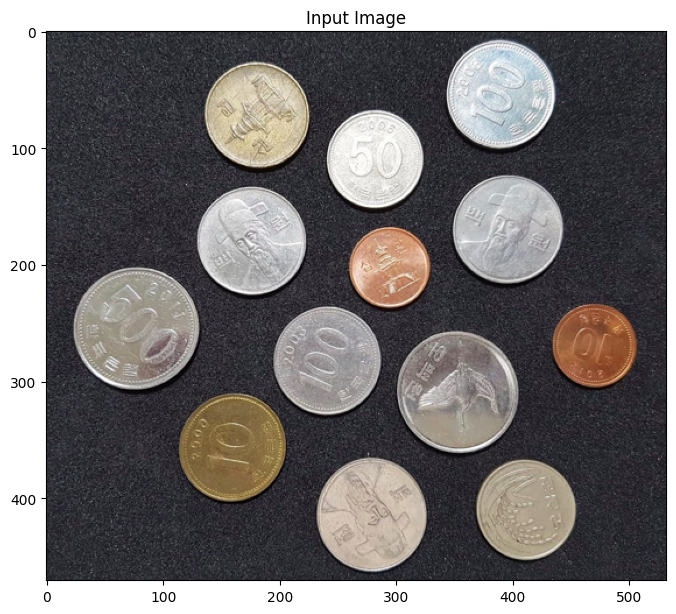

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 8), dpi=100)

img = cv2.imread('./images/practice_img/coins_spread2.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Input Image')
plt.show()

- ₩ 500 x 2 = ₩ 1,000  (the biggest silver, front '500', back '오백원')  
- ₩ 100 x 5 = ₩   500  (2nd largest silver, front '100', back '백원')  
- ₩  50 x 2 = ₩   100  (the smallest silver, front '50', back '오십원')  
- ₩  10 x 2 = ₩    20  (old, yellow, front '10', back '십원')      
- ₩  10 x 2 = ₩    20  (new, bronze, front '10', back '십원')    
- total amt = ₩ 1,640  

[[[353.25     308.25      52.81217 ]
  [240.75     282.75      46.050243]
  [411.75     410.25      42.66292 ]
  [281.25     110.25      40.90385 ]
  [176.25     179.25      46.250675]
  [389.25      53.25      45.979614]
  [ 78.75     254.25      52.18357 ]
  [158.25     356.25      46.99601 ]
  [278.25     414.75      48.09496 ]
  [294.75     201.75      34.72931 ]
  [395.25     167.25      48.519325]
  [182.25      71.25      45.995922]
  [470.25     267.75      36.402267]]]


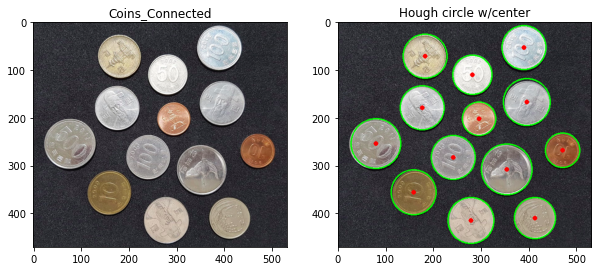

In [88]:
# Calculate coin money using OpenCV Python
import cv2
import numpy as np

img = cv2.imread('./images/practice_img/coins_spread2.png')
img_org = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

blur = cv2.medianBlur(gray, 5)#cv2.GaussianBlur(gray, (3,3), 0)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.5, 30, None, 200)
print(circles)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(img,(i[0], i[1]), i[2], (0, 255, 0), 2) 
        cv2.circle(img, (i[0], i[1]), 2, (0,0,255), 5) 

cv2.imshow('hough circle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)), axs[0].set_title('Coins_Connected')
axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[1].set_title('Hough circle w/center')

plt.show()

## Get radius values

In [65]:

r = []
for c in circles[0, :]:
    r.append(c[2])
r = sorted(r)
r

[35, 36, 41, 43, 46, 46, 46, 46, 47, 48, 49, 52, 53]

## Find the ratio of others to the smallest radius

In [72]:
smallest_radius = 35
for i in r:
    print(i, ": ", round(i/35, 1))

35 :  1.0
36 :  1.0
41 :  1.2
43 :  1.2
46 :  1.3
46 :  1.3
46 :  1.3
46 :  1.3
47 :  1.3
48 :  1.4
49 :  1.4
52 :  1.5
53 :  1.5


## Solution
### Use ratio to identify coins
### Same ratio but different values -> use color to separate coins
* Ratio 1.0: ₩10
* Ratio 1.2: ₩50
* Ratio 1.3: ₩10 and ₩100 -> <font color='blue'>₩100 has a larger thresh in blue color space.</font> 
* Ratio 1.4: ₩100
* Ratio 1.5: ₩500



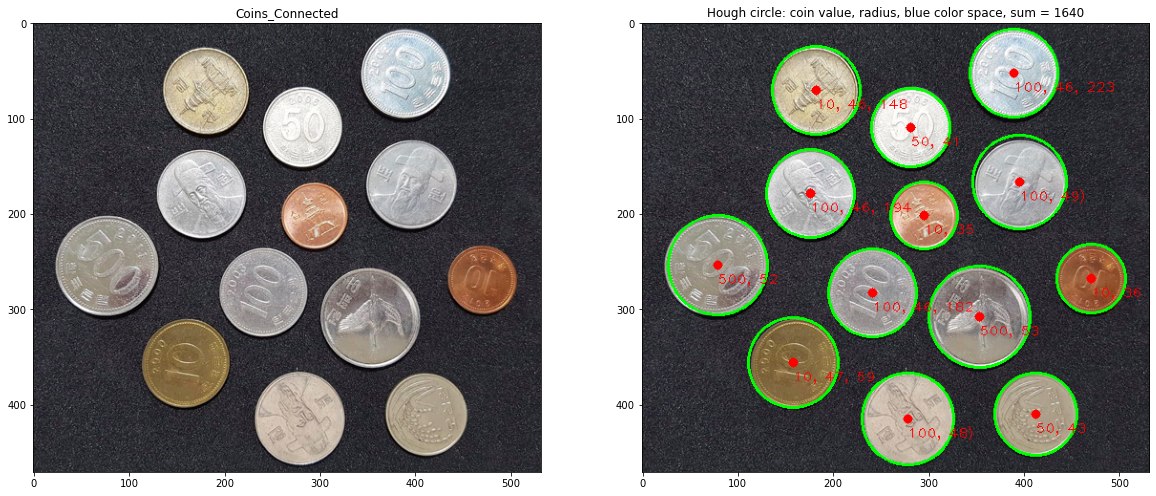

In [133]:
img = cv2.imread('./images/practice_img/coins_spread2.png')
sum_won = 0

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(img,(i[0], i[1]), i[2], (0, 255, 0), 2) 
        cv2.circle(img, (i[0], i[1]), 2, (0,0,255), 5)
        b = int(img[i[1]-15, i[0], 0])
        g = int(img[i[1]-15, i[0], 1])
        r = int(img[i[1]-15, i[0], 2])
        if round(i[2]/35, 1) == 1.0:
            cv2.putText(img, f"10, {i[2]}", (i[0], i[1]+20), 
                        cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))
            sum_won += 10
        if round(i[2]/35, 1) == 1.2:
            cv2.putText(img, f"50, {i[2]}", (i[0], i[1]+20), 
                        cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))
            sum_won += 50
        if round(i[2]/35, 1) == 1.3 and b < 160:
            cv2.putText(img, f"10, {i[2]}, {b}", (i[0], i[1]+20), 
                        cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))
            sum_won += 10
        if round(i[2]/35, 1) == 1.3 and b > 160:
            cv2.putText(img, f"100, {i[2]}, {b}", (i[0], i[1]+20), 
                        cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))
            sum_won += 100
        if round(i[2]/35, 1) == 1.4:
            cv2.putText(img, f"100, {i[2]})", (i[0], i[1]+20), 
                        cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))
            sum_won += 100
        if round(i[2]/35, 1) == 1.5:
            cv2.putText(img, f"500, {i[2]}", (i[0], i[1]+20), 
                        cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))
            sum_won += 500
            
cv2.imshow('hough circle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20,20))
axs[0].imshow(cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)), axs[0].set_title('Coins_Connected')
axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),
axs[1].set_title(f'Hough circle: coin value, radius, blue color space, sum = {sum_won}');
